# House Hold Power Consumption

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Shubham3023/Machine_Learning/main/Thirteen%20Regression%20Models%20on%20%20House%20Power%20Consumption%20Dataset/household_power_consumption_cleaned.csv')
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use
0,0.312,0.062,242.60,1.2,0,0,1,2,11,1
1,0.870,0.186,243.51,3.6,0,0,13,5,9,13
2,1.546,0.278,239.99,6.4,0,1,18,19,4,19
3,0.614,0.000,236.88,2.6,1,0,0,14,10,1
4,1.328,0.146,243.24,5.4,0,0,1,13,5,1
...,...,...,...,...,...,...,...,...,...,...
48395,0.316,0.062,242.78,1.2,0,0,1,29,4,1
48396,0.264,0.078,241.44,1.2,0,0,0,1,9,0
48397,0.736,0.166,236.98,3.2,0,0,1,7,10,1
48398,0.366,0.298,231.83,2.0,0,1,0,17,7,1


# Observation

There are 48400 entries and 10 columns. 

In [3]:
#check for null values
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
day                      0
month                    0
Total_power_use          0
dtype: int64

# Observation

No Null values found in the dataset.

In [4]:
#summing up all the sub metering columns to form a total power consumption
data['Total_Power_Consumption'] = data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']
data.Total_Power_Consumption

0         1
1        13
2        19
3         1
4         1
         ..
48395     1
48396     0
48397     1
48398     1
48399    18
Name: Total_Power_Consumption, Length: 48400, dtype: int64

In [5]:
#dropping all the necessary columns
data.drop(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'day', 'month', 'Total_power_use'], axis=1, inplace=True)

In [6]:
#resulting dataset
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Power_Consumption
0,0.312,0.062,242.60,1.2,1
1,0.870,0.186,243.51,3.6,13
2,1.546,0.278,239.99,6.4,19
3,0.614,0.000,236.88,2.6,1
4,1.328,0.146,243.24,5.4,1
...,...,...,...,...,...
48395,0.316,0.062,242.78,1.2,1
48396,0.264,0.078,241.44,1.2,0
48397,0.736,0.166,236.98,3.2,1
48398,0.366,0.298,231.83,2.0,1


In [7]:
axhead = {'family':'sherif', 'color':'red', 'size':15, 'weight':'bold'}

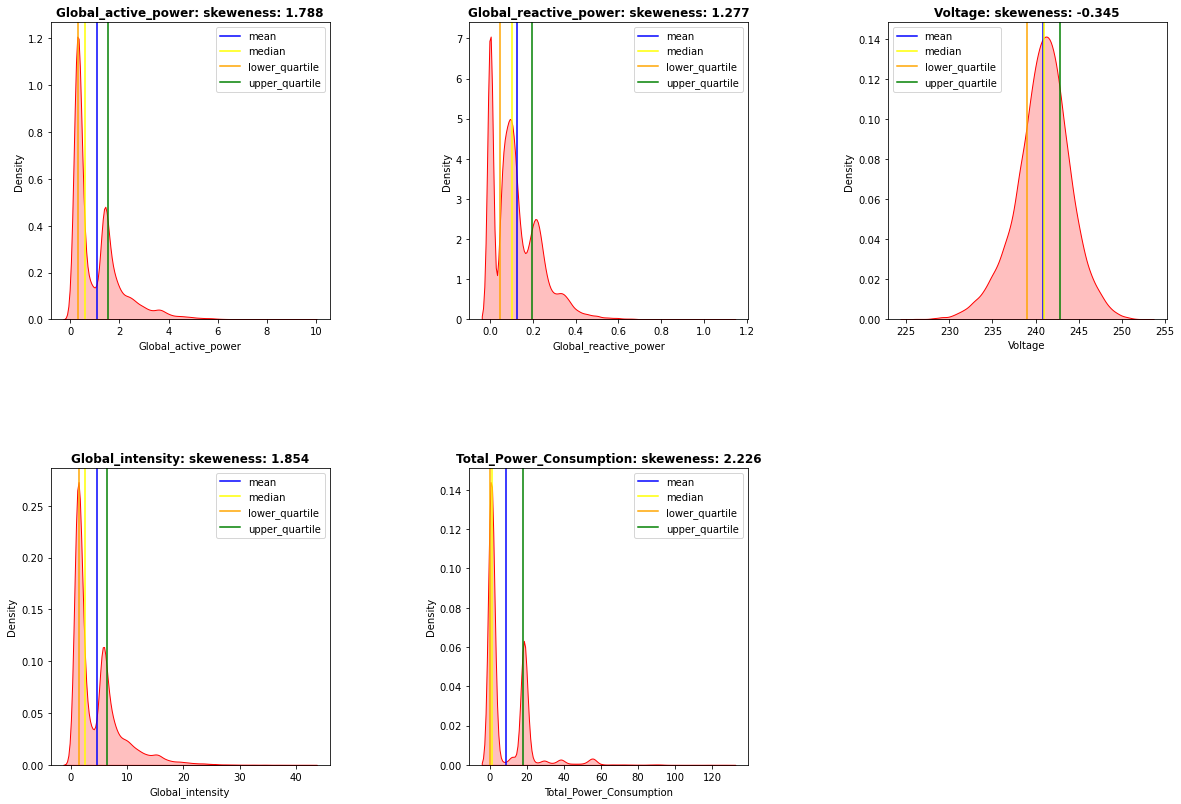

In [8]:
#checking the distribution of the dataset
plt.figure(figsize=(20,20))
plt.title('Distribution of the dataset', fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(len(data.columns)):
    ax = plt.subplot(3,3,i+1)
    ax = sns.kdeplot(data[data.columns[i]], shade=True, ax=ax, color='red')
    ax.axvline(data[data.columns[i]].mean(), color='blue', label='mean')
    ax.axvline(data[data.columns[i]].median(), color='yellow', label='median')
    ax.axvline(data[data.columns[i]].quantile(0.25), color='orange', label='lower_quartile')
    ax.axvline(data[data.columns[i]].quantile(0.75), color='green', label='upper_quartile')
    ax.set_title(f'{data.columns[i]}: '  'skeweness: {}'.format(round(data[data.columns[i]].skew(),3)), fontweight='bold')
    ax.legend()

In [9]:
#importing Q-Q Plot
from scipy.stats import probplot

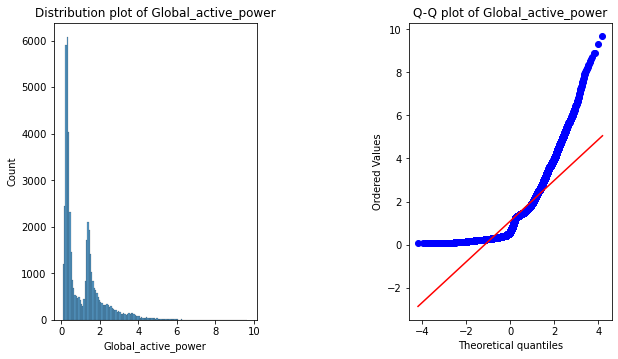

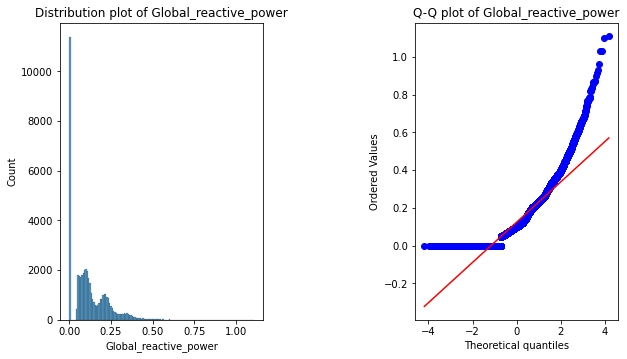

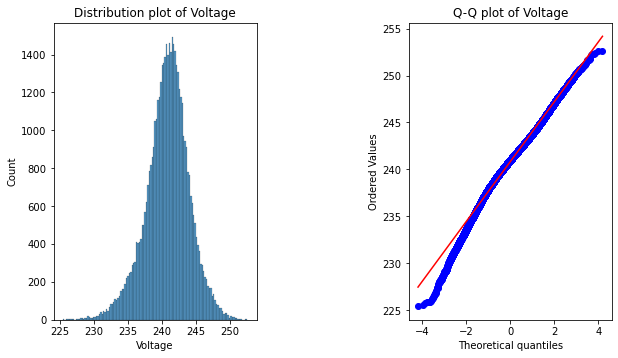

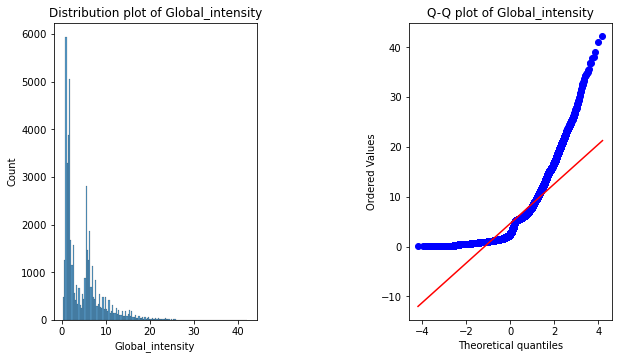

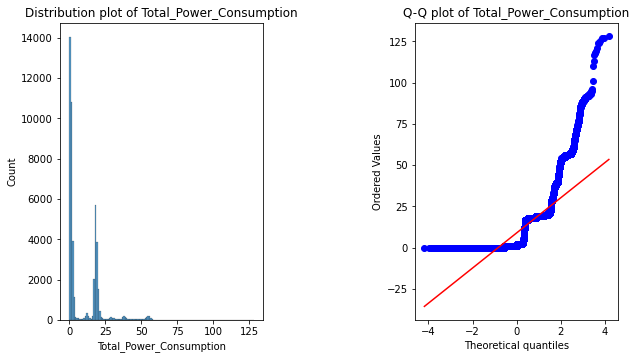

In [10]:
#histplot and Q-Q Plot to 
for feature in data.columns:
    plt.figure(figsize=(10,5))
    plt.subplots_adjust(top=0.95)
    plt.subplots_adjust(wspace=0.75, hspace=0.75)
    plt.subplot(1, 2, 1)
    ax = sns.histplot(data[feature])
    plt.title('Distribution plot of {}'.format(feature))
    
    ax = plt.subplot(1, 2, 2)
    ax = probplot(data[feature], plot=plt, dist='norm', fit=True)
    plt.title('Q-Q plot of {}'.format(feature))
    plt.show()

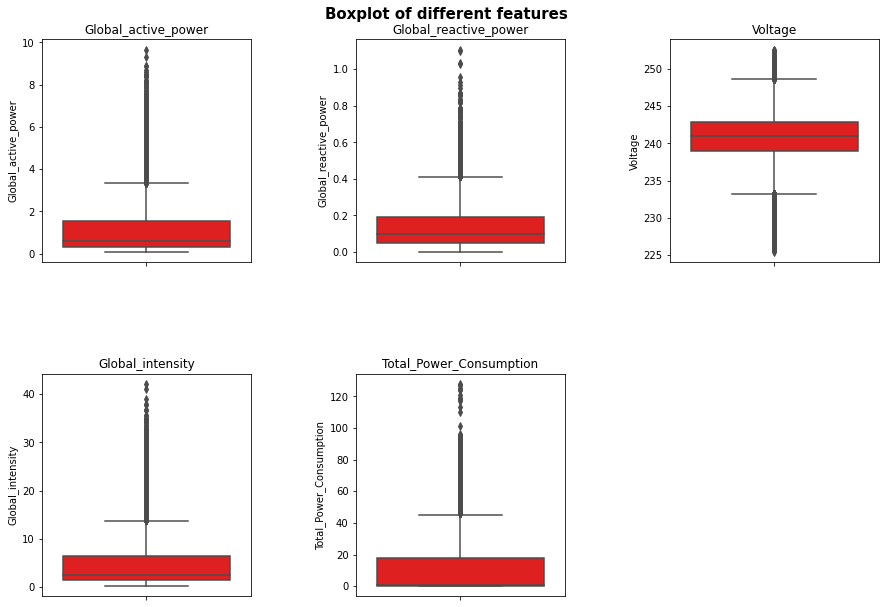

In [11]:
#checking for outliers
plt.figure(figsize=(15,15))
plt.suptitle('Boxplot of different features', fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(len(data.columns)):
    ax = plt.subplot(3,3,i+1)
    ax = sns.boxplot(y=data[data.columns[i]], ax=ax, color='red')
    ax.set_title('{}'.format(data.columns[i]))

In [12]:
#capping the outliers
for feature in [feature for feature in data.columns if feature not in ['Total_Power_Consumption']]:
    upper_quantile = data[feature].quantile(0.75)
    lower_quantile = data[feature].quantile(0.25)
    inter_quantile = upper_quantile-lower_quantile
    upper_boundary = upper_quantile+(1.5*inter_quantile)
    lower_boundary = lower_quantile-(1.5*inter_quantile)
    data.loc[data[feature]>upper_boundary, feature] = upper_boundary
    data.loc[data[feature]<lower_boundary, feature] = lower_boundary

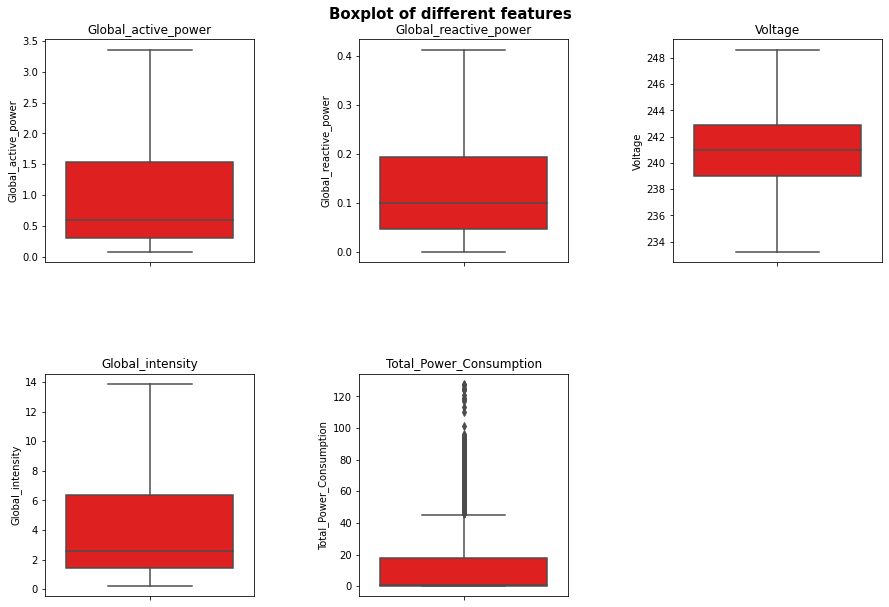

In [13]:
#checking for outliers
plt.figure(figsize=(15,15))
plt.suptitle('Boxplot of different features', fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(len(data.columns)):
    ax = plt.subplot(3,3,i+1)
    ax = sns.boxplot(y=data[data.columns[i]], ax=ax, color='red')
    ax.set_title('{}'.format(data.columns[i]))

In [14]:
#importing train and test split
from sklearn.model_selection import train_test_split

In [15]:
#independent dataset
x = data.drop('Total_Power_Consumption', axis=1)
x

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,0.312,0.062,242.60,1.2
1,0.870,0.186,243.51,3.6
2,1.546,0.278,239.99,6.4
3,0.614,0.000,236.88,2.6
4,1.328,0.146,243.24,5.4
...,...,...,...,...
48395,0.316,0.062,242.78,1.2
48396,0.264,0.078,241.44,1.2
48397,0.736,0.166,236.98,3.2
48398,0.366,0.298,233.20,2.0


In [16]:
#Target variable
y = data.Total_Power_Consumption

In [17]:
#applying train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [18]:
#shape of training and test dataset
print('shape of x_train:', x_train.shape, '\nshape of y_train:', y_train.shape, '\nshape of x_test:',
     x_test.shape, '\nshape of y_test:', y_test.shape)

shape of x_train: (38720, 4) 
shape of y_train: (38720,) 
shape of x_test: (9680, 4) 
shape of y_test: (9680,)


In [19]:
#featuring scaling
#importing column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [20]:
#creating an object for standard scalar
std = StandardScaler()

In [21]:
#transforming the training feature
x_train = pd.DataFrame(std.fit_transform(x_train), columns=std.feature_names_in_)

In [22]:
#transforming the test feature
x_test = pd.DataFrame(std.fit_transform(x_test), columns=std.feature_names_in_)

In [23]:
#importing all the models and performance metrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [24]:
#models and its metrics
models = []
Accuracy_score = []
R2_score = []
Adj_R2score = []
Mean_squared_error = []
Mean_absolute_error = []
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
ada = AdaBoostRegressor()
gradient = GradientBoostingRegressor()
extra = ExtraTreesRegressor()
bag = BaggingRegressor()
random = RandomForestRegressor()
decision = DecisionTreeRegressor()
svc = SVC()
def fitting(x_train, x_test, y_train, y_test, model, model_name):
    fitting = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    adj_r2_sco=round(1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),4)
    mean = mean_squared_error(y_test, y_pred)
    abso = mean_absolute_error(y_test, y_pred)
    
    models.append(model_name)
    R2_score.append(score)
    Adj_R2score.append(adj_r2_sco)
    Mean_squared_error.append(mean)
    Mean_absolute_error.append(abso)

In [25]:
#linear regression model
fitting(x_train, x_test, y_train, y_test, linear, 'Linear_Regression')

In [26]:
#ridge
fitting(x_train, x_test, y_train, y_test, ridge, 'Ridge_Regression')

In [27]:
#lasso
fitting(x_train, x_test, y_train, y_test, lasso, 'Lasso_Regression')

In [28]:
#elastic
fitting(x_train, x_test, y_train, y_test, elastic, 'Elastic_Net')

In [29]:
#adaboost
fitting(x_train, x_test, y_train, y_test, ada, 'Ada_Boost_Regressor')

In [30]:
#gradient
fitting(x_train, x_test, y_train, y_test, gradient, 'Gradient_Boosting_Regressor')

In [31]:
#extratree
fitting(x_train, x_test, y_train, y_test, extra, 'Extra_Tree_Regressor')

In [32]:
#bagging regressor
fitting(x_train, x_test, y_train, y_test, bag, 'Bagging_Regression')

In [33]:
#random forest
fitting(x_train, x_test, y_train, y_test, random, 'Random_forest_Regressor')

In [34]:
#decision tree
fitting(x_train, x_test, y_train, y_test, decision, 'Decision_tree_regressor')

In [35]:
#svc
fitting(x_train, x_test, y_train, y_test, svc, 'Support_Vector_Machines')

In [36]:
#making dictionary
last = {'models':models, 'R2_score':R2_score, 'adj_R2_score':Adj_R2score, 
       'squared_error':Mean_squared_error, 'absolute_error':Mean_absolute_error}

In [37]:
#model performance based on score
pd.DataFrame(last).sort_values(by='R2_score', ascending=False).reset_index(drop=True)

,models,R2_score,adj_R2_score,squared_error,absolute_error
0,Gradient_Boosting_Regressor,0.718204,0.7181,42.189629,3.373305
1,Random_forest_Regressor,0.685877,0.6857,47.029477,3.420652
2,Ada_Boost_Regressor,0.681477,0.6813,47.688256,3.890181
3,Extra_Tree_Regressor,0.672710,0.6726,49.000850,3.431837
4,Bagging_Regression,0.666271,0.6661,49.964817,3.526829
5,Linear_Regression,0.656411,0.6563,51.440978,4.343532
6,Ridge_Regression,0.656396,0.6563,51.443199,4.341909
7,Lasso_Regression,0.649089,0.6489,52.537323,4.471916
8,Elastic_Net,0.623475,0.6233,56.372055,4.993436
9,Support_Vector_Machines,0.555861,0.5557,66.495041,3.290083
